# San Franscisco crime data

In [1]:
# Import Libraries 
import pandas as pd
import numpy as np 

#### Load the data 

In [30]:
df_train = pd.read_csv(r"C:\Users\Pc\Downloads\San franscisco Crime Data\Data\train.csv")
df_test = pd.read_csv(r"C:\Users\Pc\Downloads\San franscisco Crime Data\Data\test.csv")

In [34]:
df_train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [36]:
df_test.head()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


#### Print the shape of data 

In [38]:

print("Train shape:", df_train.shape)
print("Test shape:", df_test.shape)

Train shape: (878049, 9)
Test shape: (884262, 7)


#### Check data types and nulls

In [40]:
df_train.info()
df_train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64

#### Convert the date column to datetime

In [44]:
df_train['Dates'] = pd.to_datetime(df_train['Dates'])

Set it as index for time-based analysis 

In [46]:
df_train.set_index('Dates', inplace=True)

In [54]:
df_train.head()

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
Dates,,,,,,,,
2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


#### Check duplicates

In [56]:
duplicates = df_train.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

Duplicate rows: 181606


#### Drop duplicates

In [58]:
df_train.drop_duplicates(inplace=True)

In [60]:
df_train.shape

(696443, 8)

In [62]:
# Unique crime types
print(df_train['Category'].value_counts().head(10))

# Unique police districts
print(df_train['PdDistrict'].value_counts())

# If there's a day-of-week column
if 'DayOfWeek' in df_train.columns:
    print(df_train['DayOfWeek'].value_counts())


Category
LARCENY/THEFT     122417
OTHER OFFENSES    102670
NON-CRIMINAL       66829
ASSAULT            65844
VEHICLE THEFT      50398
VANDALISM          39766
DRUG/NARCOTIC      38026
BURGLARY           33476
WARRANTS           29367
SUSPICIOUS OCC     26212
Name: count, dtype: int64
PdDistrict
SOUTHERN      97929
MISSION       94719
NORTHERN      90047
BAYVIEW       78714
INGLESIDE     71533
CENTRAL       70358
TARAVAL       58727
TENDERLOIN    51624
PARK          42065
RICHMOND      40727
Name: count, dtype: int64
DayOfWeek
Friday       105648
Wednesday    101701
Saturday      99419
Thursday      99158
Tuesday       99136
Monday        97494
Sunday        93887
Name: count, dtype: int64


In [64]:
#Create New Time Features
df_train['Year'] = df_train.index.year
df_train['Month'] = df_train.index.month
df_train['Day'] = df_train.index.day
df_train['Hour'] = df_train.index.hour if 'Time' in df_train.columns else None

C:\Users\Pc\AppData\Local\Temp\ipykernel_13300\372119683.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_crime = df_train.resample('M').size()


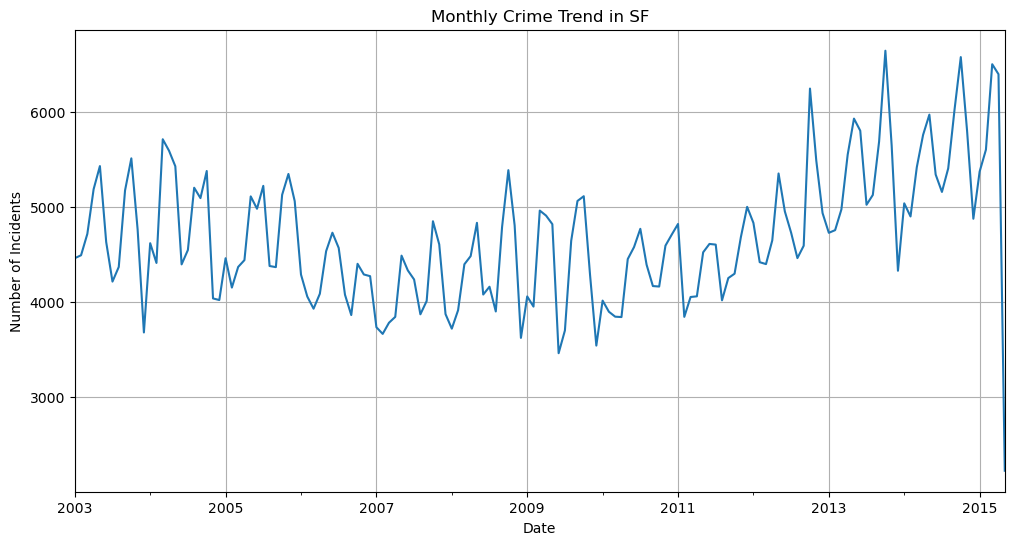

In [66]:
import matplotlib.pyplot as plt

# Monthly trend
monthly_crime = df_train.resample('M').size()

plt.figure(figsize=(12,6))
monthly_crime.plot()
plt.title("Monthly Crime Trend in SF")
plt.xlabel("Date")
plt.ylabel("Number of Incidents")
plt.grid(True)
plt.show()


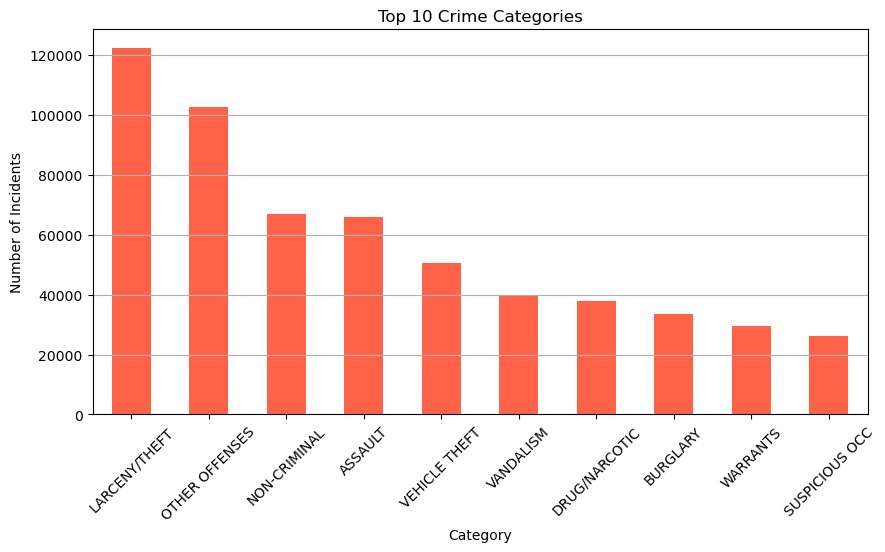

In [68]:
# 1. Crimes Over Time (Monthly Trend)
top_crimes = df_train['Category'].value_counts().head(10)

plt.figure(figsize=(10,5))
top_crimes.plot(kind='bar', color='tomato')
plt.title("Top 10 Crime Categories")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

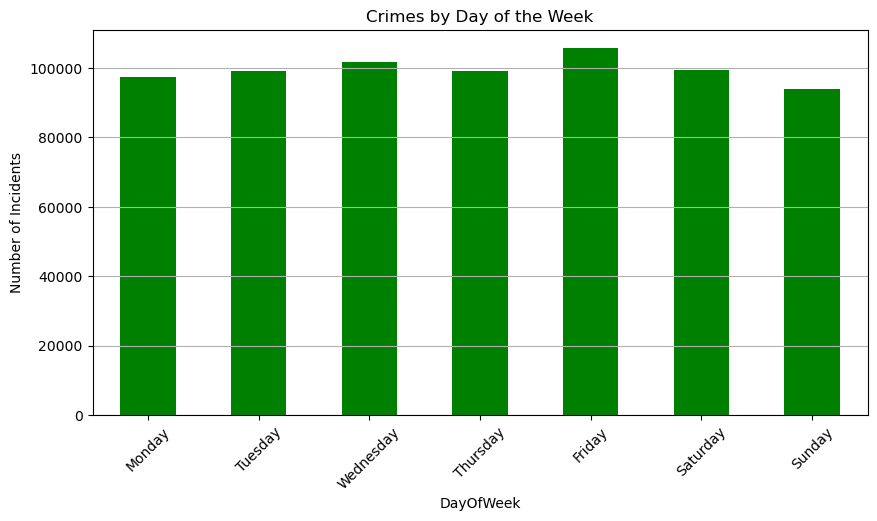

In [70]:
# Crimes by Day of the Week
if 'DayOfWeek' in df_train.columns:
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    day_crime = df_train['DayOfWeek'].value_counts().reindex(day_order)

    plt.figure(figsize=(10,5))
    day_crime.plot(kind='bar', color='green')
    plt.title("Crimes by Day of the Week")
    plt.ylabel("Number of Incidents")
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()


### Time-Series Forecasting with ARIMA

C:\Users\Pc\AppData\Local\Temp\ipykernel_13300\2379154833.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts = df_train.resample('M').size()
C:\Users\Pc\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Pc\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


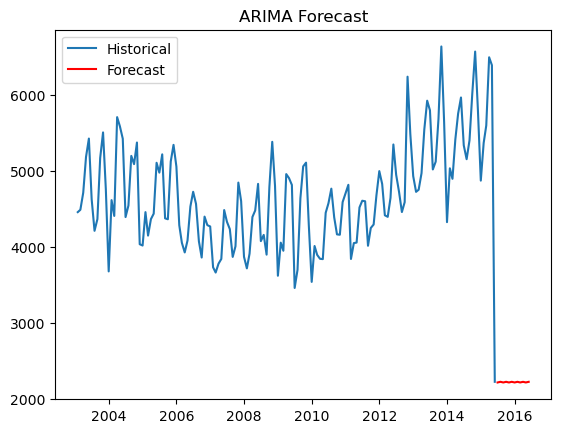

In [74]:
from statsmodels.tsa.arima.model import ARIMA

# Time series (monthly crime count)
ts = df_train.resample('M').size()

# Fit ARIMA model (order can be tuned)
model = ARIMA(ts, order=(1,1,1))
model_fit = model.fit()

# Forecast next 12 months
forecast = model_fit.forecast(steps=12)

# Plot
import matplotlib.pyplot as plt
plt.plot(ts, label='Historical')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.legend()
plt.title("ARIMA Forecast")
plt.show()

#### District wise

In [77]:
# Ensure 'Date' is index if not already
df_train.index = pd.to_datetime(df_train.index)

# Filter valid districts (drop NaNs)
df_train = df_train[df_train['PdDistrict'].notnull()]

# Get list of unique districts
districts = df_train['PdDistrict'].unique()

### Forecast monthly crime trends for a specific police district using ARIMA

In [79]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

def forecast_district(district_name, steps=12):
    ts = df_train[df_train['PdDistrict'] == district_name].resample('M').size()
    
    if len(ts) < 24:
        return None  # Skip districts with not enough data

    try:
        model = ARIMA(ts, order=(1,1,1))
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=steps)
        return ts, forecast
    except:
        return None

### Generate and store ARIMA forecasts for each police district


In [81]:
district_forecasts = {}

for district in districts:
    result = forecast_district(district)
    if result:
        history, forecast = result
        district_forecasts[district] = (history, forecast)

### Visualize historical and forecasted monthly crime trends for each district

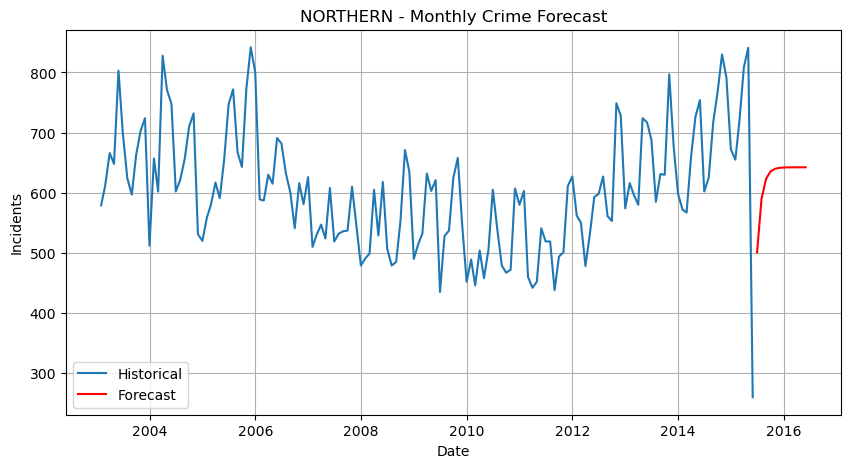

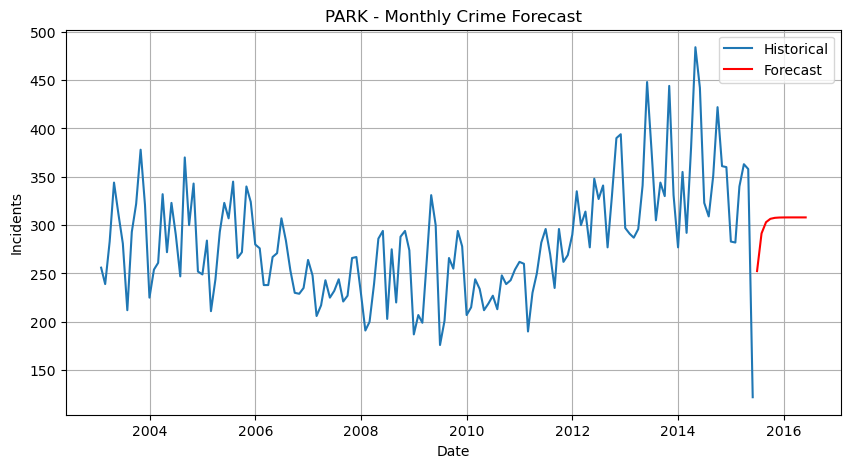

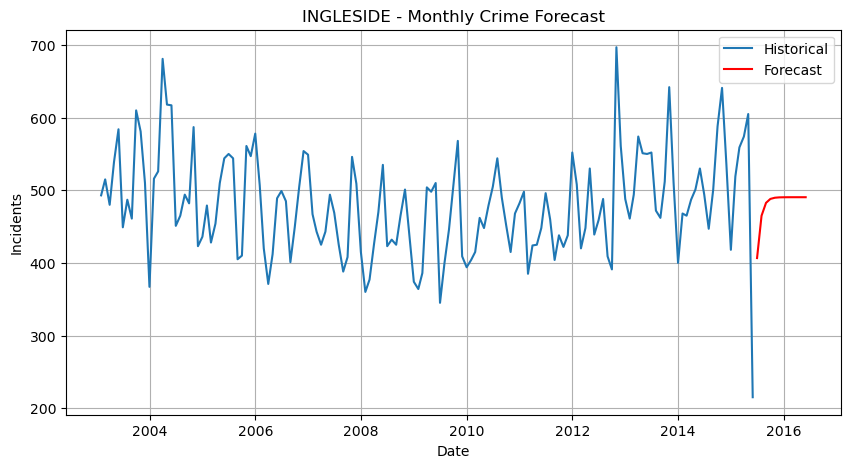

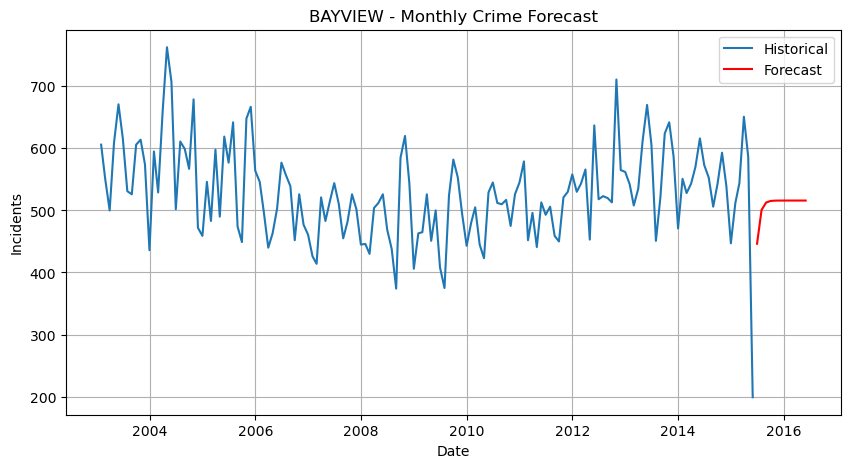

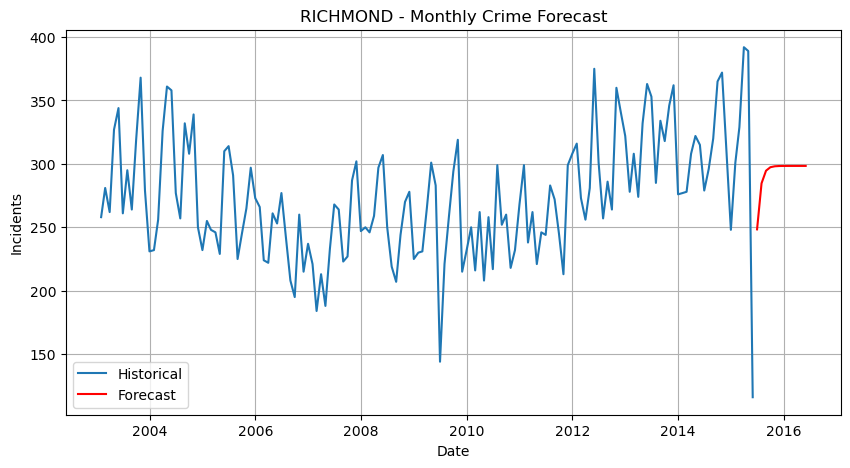

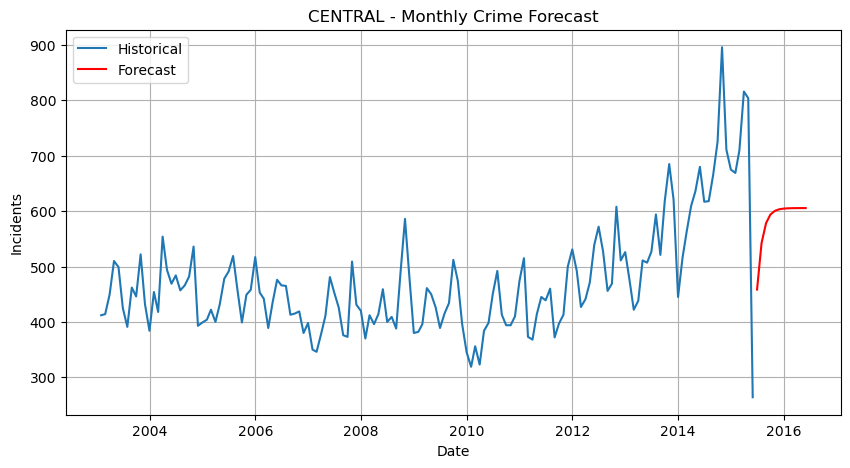

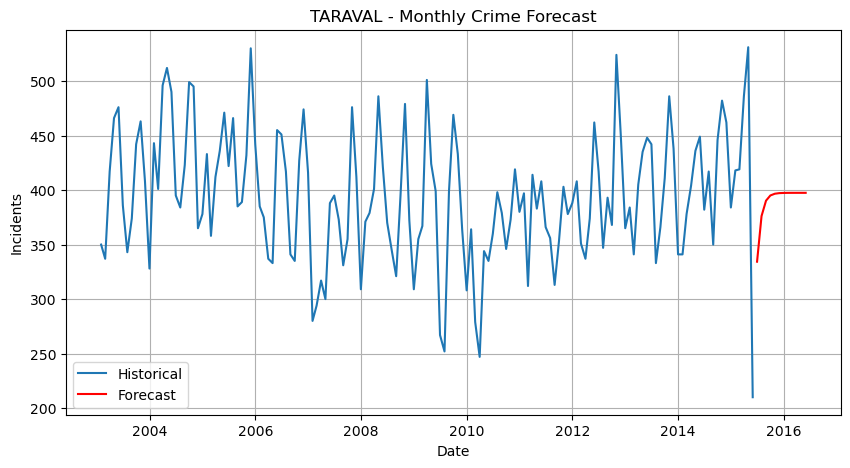

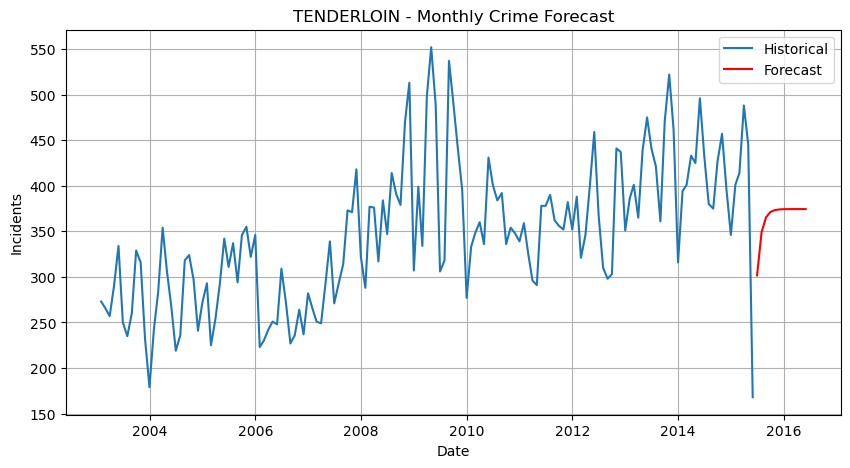

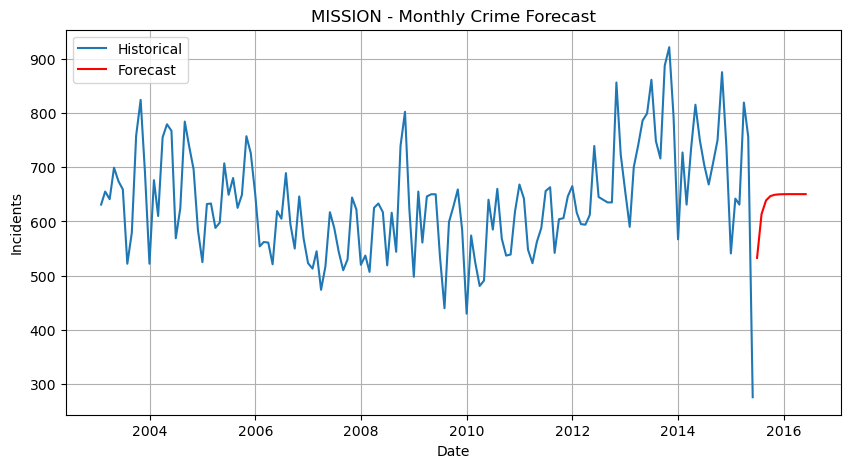

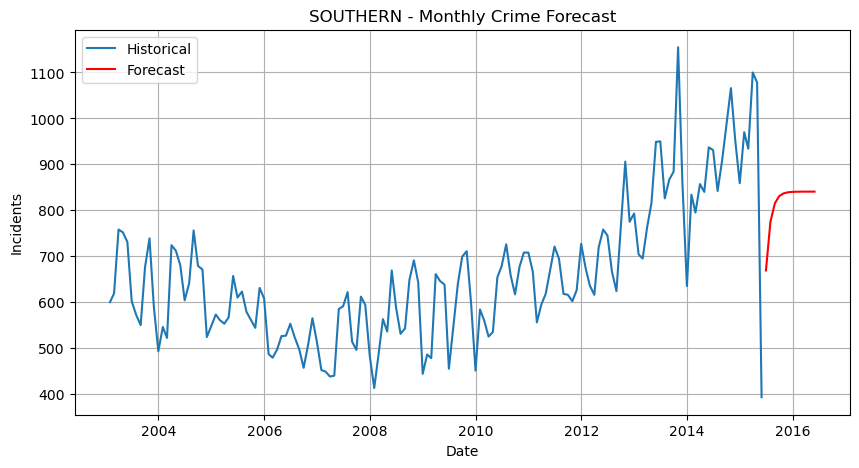

In [83]:
import matplotlib.pyplot as plt

for district, (history, forecast) in district_forecasts.items():
    plt.figure(figsize=(10, 5))
    plt.plot(history, label='Historical')
    plt.plot(forecast.index, forecast, label='Forecast', color='red')
    plt.title(f"{district} - Monthly Crime Forecast")
    plt.xlabel("Date")
    plt.ylabel("Incidents")
    plt.legend()
    plt.grid(True)
    plt.show()

### Plot crime forecast trends for all districts on a single graph for comparison

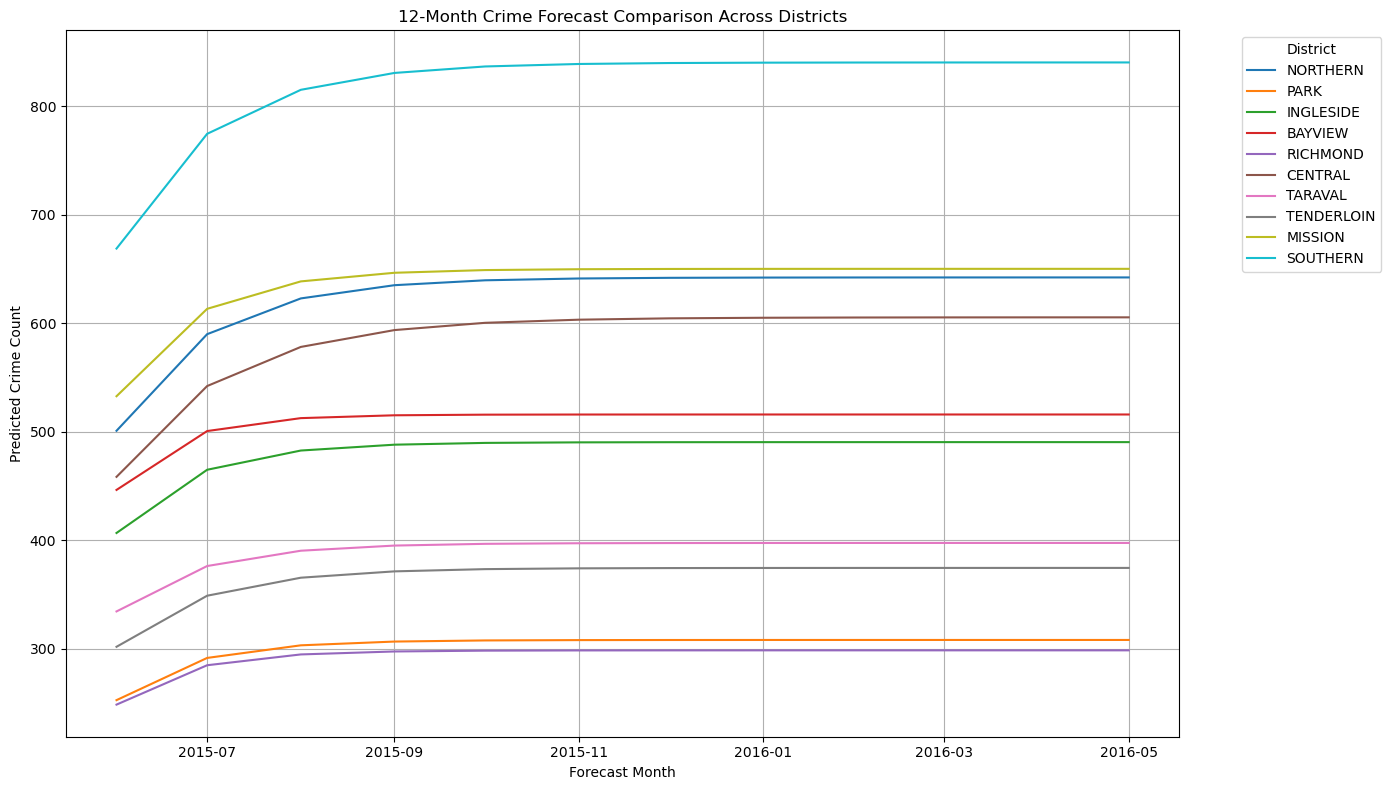

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

forecast_months = None  # To store x-axis once
districts_forecasted = []

for district in df_train['PdDistrict'].unique():
    result = forecast_district(district)
    if result:
        ts, forecast = result
        forecast_index = pd.date_range(ts.index[-1] + pd.offsets.MonthBegin(1), periods=len(forecast), freq='MS')

        if forecast_months is None:
            forecast_months = forecast_index

        plt.plot(forecast_index, forecast, label=district)
        districts_forecasted.append(district)

plt.title('12-Month Crime Forecast Comparison Across Districts')
plt.xlabel('Forecast Month')
plt.ylabel('Predicted Crime Count')
plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

### Generate and save 12-month crime forecasts for each district as a CSV


In [93]:
forecast_list = []

for district in df_train['PdDistrict'].unique():
    result = forecast_district(district)
    if result:
        ts, forecast = result
        forecast_index = pd.date_range(ts.index[-1] + pd.offsets.MonthBegin(1), periods=len(forecast), freq='MS')
        for date, value in zip(forecast_index, forecast):
            forecast_list.append({
                'District': district,
                'Date': date,
                'Forecasted_Crime_Count': value
            })

# Convert to DataFrame and export
forecast_df = pd.DataFrame(forecast_list)
forecast_df.to_csv("district_forecast.csv", index=False)